In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.formula.api as smf

In [2]:
df=pd.read_excel("C:/Users/pcc/Downloads/CocaCola_Sales_Rawdata.xlsx")
df

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [3]:
df["quarter"]=0
for i in range(42):
    p=df["Quarter"][i]
    df["quarter"][i]=p[0:2]

In [4]:
df["quarter"].value_counts()

Q1    11
Q2    11
Q3    10
Q4    10
Name: quarter, dtype: int64

In [5]:
df_dummy=pd.DataFrame(pd.get_dummies(df["quarter"]),columns=["Q1","Q2","Q3","Q4"])
df1=pd.concat([df,df_dummy],axis=1)
df1

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0
5,Q2_87,2104.411995,Q2,0,1,0,0
6,Q3_87,2014.362999,Q3,0,0,1,0
7,Q4_87,1991.746998,Q4,0,0,0,1
8,Q1_88,1869.049999,Q1,1,0,0,0
9,Q2_88,2313.631996,Q2,0,1,0,0


In [6]:
df1["t"]=np.arange(1,43)
df1

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t
0,Q1_86,1734.827000,Q1,1,0,0,0,1
1,Q2_86,2244.960999,Q2,0,1,0,0,2
2,Q3_86,2533.804993,Q3,0,0,1,0,3
3,Q4_86,2154.962997,Q4,0,0,0,1,4
4,Q1_87,1547.818996,Q1,1,0,0,0,5
5,Q2_87,2104.411995,Q2,0,1,0,0,6
6,Q3_87,2014.362999,Q3,0,0,1,0,7
7,Q4_87,1991.746998,Q4,0,0,0,1,8
8,Q1_88,1869.049999,Q1,1,0,0,0,9
9,Q2_88,2313.631996,Q2,0,1,0,0,10


In [38]:
df1["log_sales"]=np.log(df1["Sales"])
df1["t_sqr"]=df1["t"]**2

<AxesSubplot:>

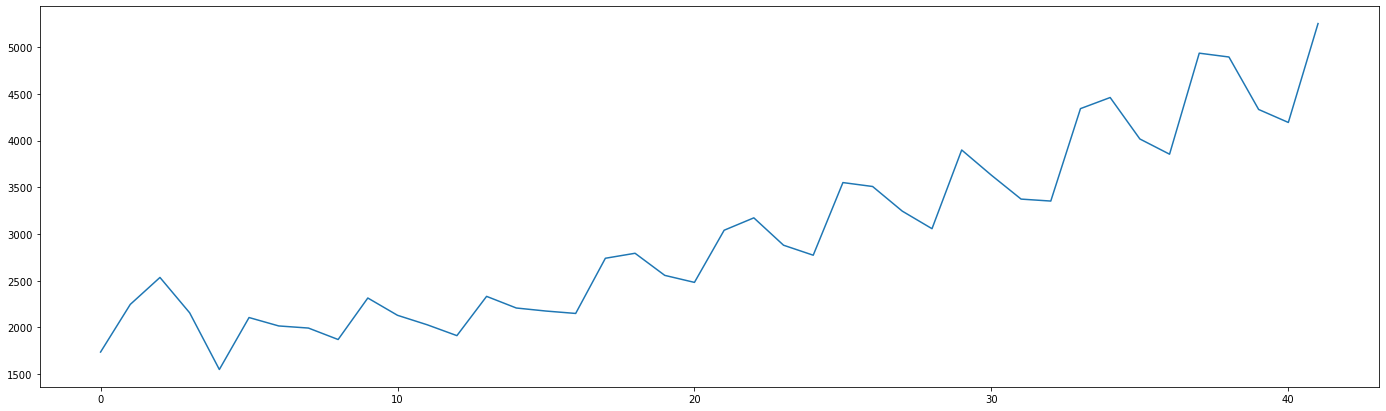

In [39]:
plt.figure(figsize=(24,7))
df['Sales'].plot()

## Spliting Data


In [40]:
train=df1.head(32)
test=df1.tail(10)

In [41]:
train

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,log_sales,t_sqr
0,Q1_86,1734.827000,Q1,1,0,0,0,1,7.458663,1
1,Q2_86,2244.960999,Q2,0,1,0,0,2,7.716443,4
2,Q3_86,2533.804993,Q3,0,0,1,0,3,7.837477,9
3,Q4_86,2154.962997,Q4,0,0,0,1,4,7.675529,16
4,Q1_87,1547.818996,Q1,1,0,0,0,5,7.344602,25
5,Q2_87,2104.411995,Q2,0,1,0,0,6,7.651791,36
6,Q3_87,2014.362999,Q3,0,0,1,0,7,7.608058,49
7,Q4_87,1991.746998,Q4,0,0,0,1,8,7.596767,64
8,Q1_88,1869.049999,Q1,1,0,0,0,9,7.533186,81
9,Q2_88,2313.631996,Q2,0,1,0,0,10,7.746574,100


In [42]:
test

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,log_sales,t_sqr
32,Q1_94,3352.0,Q1,1,0,0,0,33,8.117312,1089
33,Q2_94,4342.0,Q2,0,1,0,0,34,8.376090,1156
34,Q3_94,4461.0,Q3,0,0,1,0,35,8.403128,1225
35,Q4_94,4017.0,Q4,0,0,0,1,36,8.298291,1296
36,Q1_95,3854.0,Q1,1,0,0,0,37,8.256867,1369
37,Q2_95,4936.0,Q2,0,1,0,0,38,8.504311,1444
38,Q3_95,4895.0,Q3,0,0,1,0,39,8.495970,1521
39,Q4_95,4333.0,Q4,0,0,0,1,40,8.374015,1600
40,Q1_96,4194.0,Q1,1,0,0,0,41,8.341410,1681
41,Q2_96,5253.0,Q2,0,1,0,0,42,8.566555,1764


## Moving Average

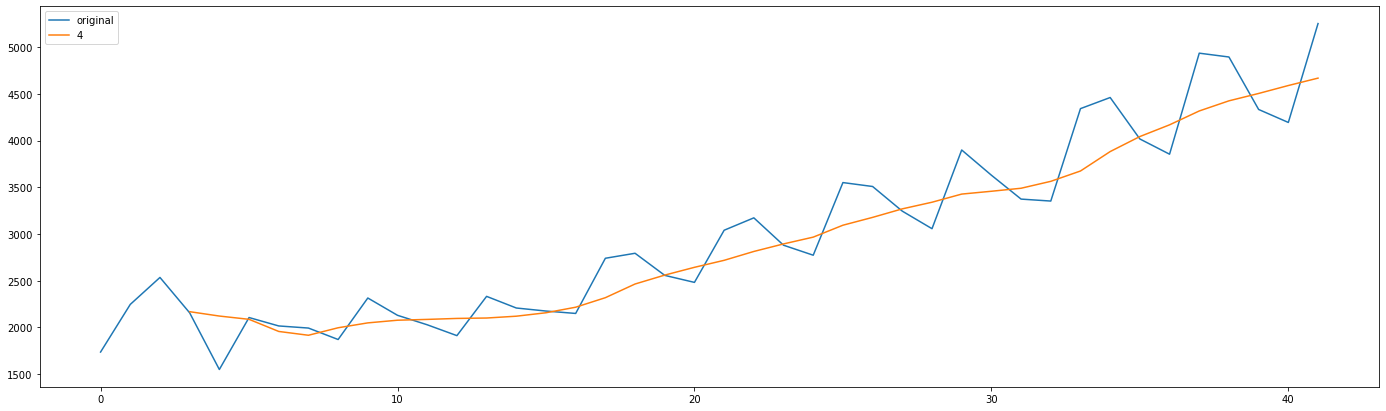

In [43]:
plt.figure(figsize=(24,7))
df["Sales"].plot(label="original")
df["Sales"].rolling(4).mean().plot(label=str(4))
plt.legend(loc='best')

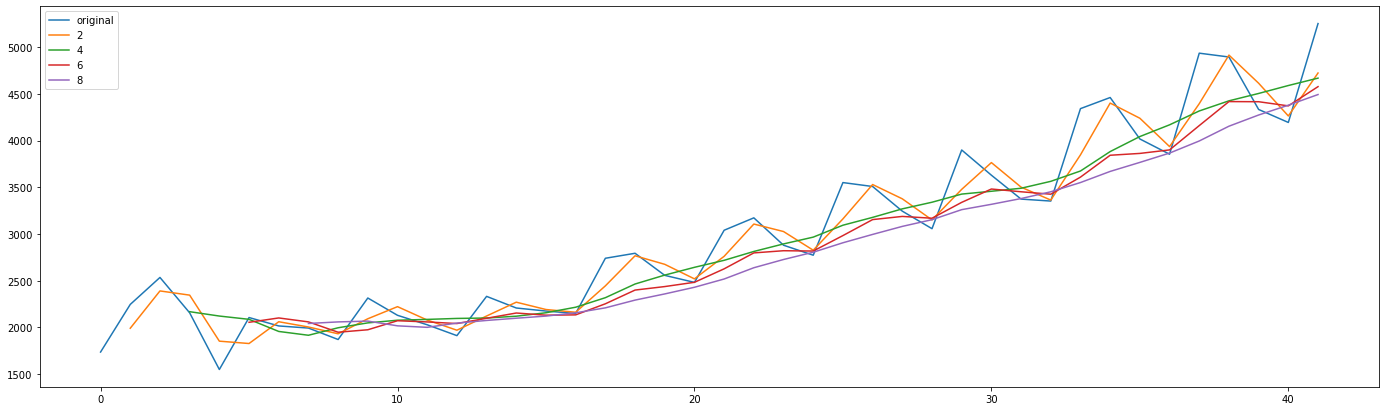

In [44]:
plt.figure(figsize=(24,7))
df["Sales"].plot(label="original")
for i in range(2,10,2):
    df["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc="best")

## Time Series decomposition plot

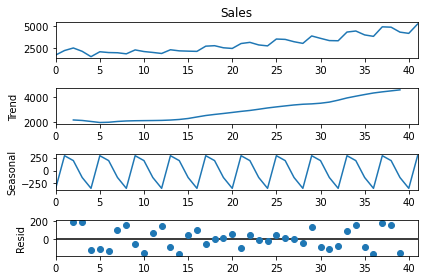

In [45]:
dec=seasonal_decompose(df["Sales"],period=4)
dec.plot()
plt.show()

## ACF and PACF plot

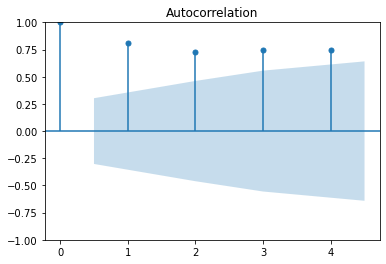

In [46]:
tsa_plots.plot_acf(df["Sales"],lags=4)
plt.show()

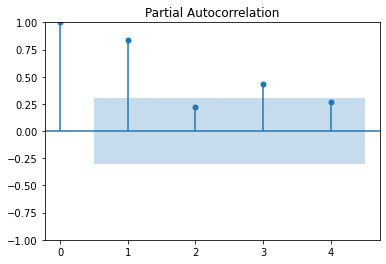

In [47]:
tsa_plots.plot_pacf(df["Sales"],lags=4)
plt.show()

In [48]:
from sklearn.metrics import mean_squared_error

In [49]:
#Linear Model
linear_model=smf.ols("Sales~t",data=train).fit()
pred_linear=linear_model.predict(test["t"])
rmse_linear=np.sqrt(mean_squared_error(test["Sales"],pred_linear))
rmse_linear

752.9233932767115

In [56]:
#Exponential
Exp=smf.ols("log_sales~t",data=train).fit()
pred_exp=Exp.predict(test["t"])
rmse_exp=np.sqrt(mean_squared_error(test["Sales"],pred_exp))
rmse_exp

4387.940544839098

In [57]:
#Quadratic 
Qud=smf.ols('Sales~t+t_sqr',data=train).fit()
pred_Qud=Qud.predict(test[["t","t_sqr"]])
rmse_Qud=np.sqrt(mean_squared_error(test["Sales"],pred_Qud))
rmse_Qud

457.73573554072897

In [64]:
#Additive seasonality 
add_sea=smf.ols("Sales~Q1+Q2+Q3+Q4",data=train).fit()
pred_add_sea=add_sea.predict(test[["Q1","Q2","Q3","Q4"]])
rmse_add_sea=np.sqrt(mean_squared_error(test["Sales"],pred_add_sea))
rmse_add_sea

1850.4665461858358

In [60]:
#Additive Seasonality Quadratic
add_sea_qua=smf.ols("Sales~t+t_sqr+Q1+Q2+Q3+Q4",data=train).fit()
pred_add_sea_qua=add_sea_qua.predict(test[["Q1","Q2","Q3","Q4","t","t_sqr"]])
rmse_add_sea_qua=np.sqrt(mean_squared_error(test["Sales"],pred_add_sea))
rmse_add_sea_qua

1850.4665461858358

In [61]:
##Multiplicative Seasonality
mul_sea=smf.ols("log_sales~Q1+Q2+Q3+Q4",data=train).fit()
pred_mul_sea=mul_sea.predict(test)
rmse_mul_sea=np.sqrt(mean_squared_error(test["Sales"],pred_mul_sea))
rmse_mul_sea

4388.397233580229

In [67]:
#Multiplicative Additive Seasonality 
mul_add_sea = smf.ols('log_sales~t+Q1+Q2+Q3+Q4',data = train).fit()
pred_mult_add_sea =mul_add_sea.predict(test)
rmse_mult_add_sea = np.sqrt(mean_squared_error(test["Sales"],pred_mult_add_sea))
rmse_mult_add_sea 

4387.942187885532

In [70]:
#Multiplicative Seasonality Quadratic 
mult_sea_Quad = smf.ols('log_sales~t+t_sqr+Q1+Q2+Q3+Q4',data=train).fit()
pred_mult_sea_quad = mult_sea_Quad.predict(test)
rmse_mult_sea_quad = np.sqrt(mean_squared_error(test['Sales'],pred_mult_sea_quad))
rmse_mult_sea_quad

4387.699110402001

In [71]:
# Compare the results
result={"model":["rmse_linear",'rmse_exp',"rmse_Qud","rmse_add_sea","rmse_add_sea_qua","rmse_mul_sea",
                 "rmse_mult_add_sea ","rmse_mult_sea_quad"],
       "RMSE_values":[rmse_linear,rmse_exp,rmse_Qud,rmse_add_sea,rmse_add_sea_qua,rmse_mul_sea,
                     rmse_mult_add_sea,rmse_mult_sea_quad]}

table=pd.DataFrame(result)
table.sort_values(["RMSE_values"])

,model,RMSE_values
2,rmse_Qud,457.735736
0,rmse_linear,752.923393
3,rmse_add_sea,1850.466546
4,rmse_add_sea_qua,1850.466546
7,rmse_mult_sea_quad,4387.699110
1,rmse_exp,4387.940545
6,rmse_mult_add_sea,4387.942188
5,rmse_mul_sea,4388.397234


## Using ARIMA model

In [79]:
data=pd.read_excel("C:/Users/pcc/Downloads/CocaCola_Sales_Rawdata.xlsx",header=0,index_col=0,parse_dates=True)
data

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996
Q2_87,2104.411995
Q3_87,2014.362999
Q4_87,1991.746998
Q1_88,1869.049999


array([[<AxesSubplot:title={'center':'Sales'}>]], dtype=object)

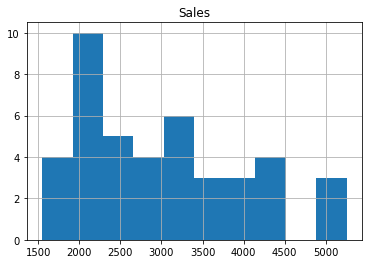

In [80]:
data.hist()

In [81]:
# separate out a validation dataset
split_pt=len(data)-10
dataset,validation=data[0:split_pt],data[split_pt:]
print('Dataset %d, validation %d' % (len(dataset), len(validation)))

dataset.to_csv("dataset.csv",header=False)
validation.to_csv("vaidation.csv",header=False)

Dataset 32, validation 10


In [83]:
data_1 = pd.read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
x=data_1.values
X = x.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [90]:
history=[x for x in train]
prediction=list()
for i in range(len(test)):
    yhat=history[-1]
    prediction.append(yhat)
    obs=test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
    
# report performance
rmse = np.sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=2173.968, Expected=2148.278
>Predicted=2148.278, Expected=2739.308
>Predicted=2739.308, Expected=2792.754
>Predicted=2792.754, Expected=2556.010
>Predicted=2556.010, Expected=2480.974
>Predicted=2480.974, Expected=3039.523
>Predicted=3039.523, Expected=3172.116
>Predicted=3172.116, Expected=2879.001
>Predicted=2879.001, Expected=2772.000
>Predicted=2772.000, Expected=3550.000
>Predicted=3550.000, Expected=3508.000
>Predicted=3508.000, Expected=3243.860
>Predicted=3243.860, Expected=3056.000
>Predicted=3056.000, Expected=3899.000
>Predicted=3899.000, Expected=3629.000
>Predicted=3629.000, Expected=3373.000
RMSE: 387.510


In [126]:
# Compare the results
result={"model":["rmse_linear",'rmse_exp',"rmse_Qud","rmse_add_sea","rmse_add_sea_qua","rmse_mul_sea",
                 "rmse_mult_add_sea ","rmse_mult_sea_quad","rmse_ARIMA"],
       "RMSE_values":[rmse_linear,rmse_exp,rmse_Qud,rmse_add_sea,rmse_add_sea_qua,rmse_mul_sea,
                     rmse_mult_add_sea,rmse_mult_sea_quad,rmse]}

table=pd.DataFrame(result)
table.sort_values(["RMSE_values"])

,model,RMSE_values
8,rmse_ARIMA,387.510406
2,rmse_Qud,457.735736
0,rmse_linear,752.923393
3,rmse_add_sea,1850.466546
4,rmse_add_sea_qua,1850.466546
7,rmse_mult_sea_quad,4387.699110
1,rmse_exp,4387.940545
6,rmse_mult_add_sea,4387.942188
5,rmse_mul_sea,4388.397234


### ARIMA model has least RMSE value, so can finalize ARIMA model for prediction.

### 2)Forecast the Airlines Passengers data set. Prepare a document for each model explaining. How many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.

In [132]:
df=pd.read_excel("C:/Users/pcc/Downloads/Airlines+Data.xlsx")
df

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [131]:
df.shape

(96, 2)

In [138]:
df["month_a"]=df["Month"].dt.strftime("%b")
df["year"]=df["Month"].dt.strftime("%Y")

In [139]:
df

,Month,Passengers,month_a,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
...,...,...,...,...
91,2002-08-01,405,Aug,2002
92,2002-09-01,355,Sep,2002
93,2002-10-01,306,Oct,2002
94,2002-11-01,271,Nov,2002


In [147]:
df_dummy=pd.DataFrame(pd.get_dummies(df["month_a"],
                                     columns=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]))
df=pd.concat([df,df_dummy],axis=1)

In [157]:
df["t"]=np.arange(1,97)


In [158]:
df

,Month,Passengers,month_a,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t
0,1995-01-01,112,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0,1
1,1995-02-01,118,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0,2
2,1995-03-01,132,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0,3
3,1995-04-01,129,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0,4
4,1995-05-01,121,May,1995,0,0,0,0,0,0,0,0,1,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,0,1,0,0,0,0,0,0,0,0,0,0,92
92,2002-09-01,355,Sep,2002,0,0,0,0,0,0,0,0,0,0,0,1,93
93,2002-10-01,306,Oct,2002,0,0,0,0,0,0,0,0,0,0,1,0,94
94,2002-11-01,271,Nov,2002,0,0,0,0,0,0,0,0,0,1,0,0,95


In [160]:
df["t_square"]=df["t"]**2
df["log_passenger"]=np.log(df["Passengers"])

In [161]:
df

,Month,Passengers,month_a,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_passenger
0,1995-01-01,112,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,1995-04-01,129,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,May,1995,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887
92,2002-09-01,355,Sep,2002,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118
93,2002-10-01,306,Oct,2002,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585
94,2002-11-01,271,Nov,2002,0,0,0,0,0,0,0,0,0,1,0,0,95,9025,5.602119


In [162]:
heatmap_month = pd.pivot_table(data = df,
                                 values = "Passengers",
                                 index = "year",
                                 columns = "month_a",
                                 aggfunc = "mean",
                                 fill_value = 0)
heatmap_month

month_a,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
year,,,,,,,,,,,,
1995,129,148,118,118,112,148,135,132,121,104,119,136
1996,135,170,140,126,115,170,149,141,125,114,133,158
1997,163,199,166,150,145,199,178,178,172,146,162,184
1998,181,242,194,180,171,230,218,193,183,172,191,209
1999,235,272,201,196,196,264,243,236,229,180,211,237
2000,227,293,229,188,204,302,264,235,234,203,229,259
2001,269,347,278,233,242,364,315,267,270,237,274,312
2002,313,405,306,277,284,413,374,317,318,271,306,355


<AxesSubplot:xlabel='month_a', ylabel='year'>

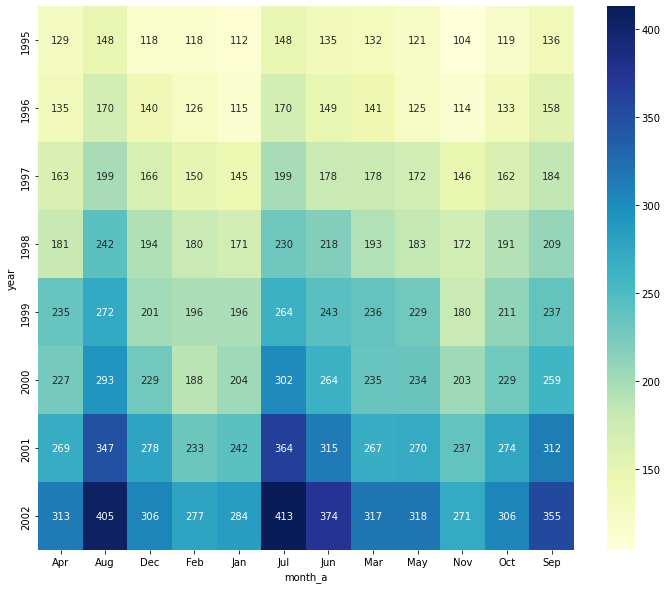

In [166]:
plt.figure(figsize=(12,10))
sns.heatmap(heatmap_month,
            annot = True,
            fmt = "g",
            cmap = 'YlGnBu') 

<AxesSubplot:xlabel='year', ylabel='Passengers'>

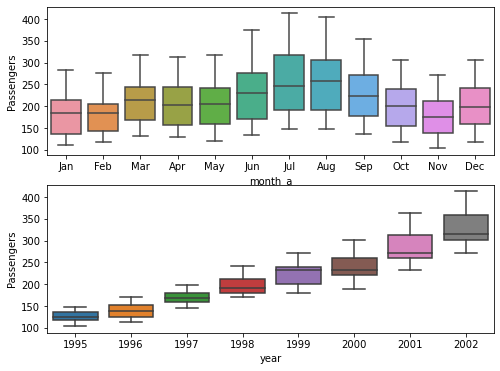

In [167]:
# Boxplot for ever
plt.figure(figsize=(8,6))

plt.subplot(211)
sns.boxplot(x="month_a",y="Passengers",data=df)

plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=df)

<AxesSubplot:xlabel='year', ylabel='Passengers'>

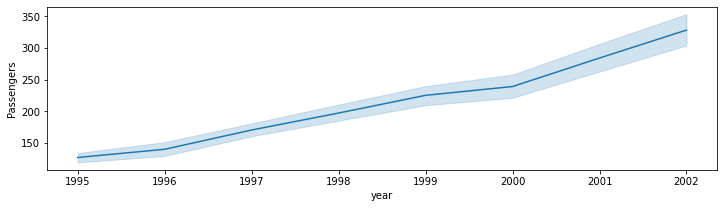

In [169]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year", y="Passengers", data=df)

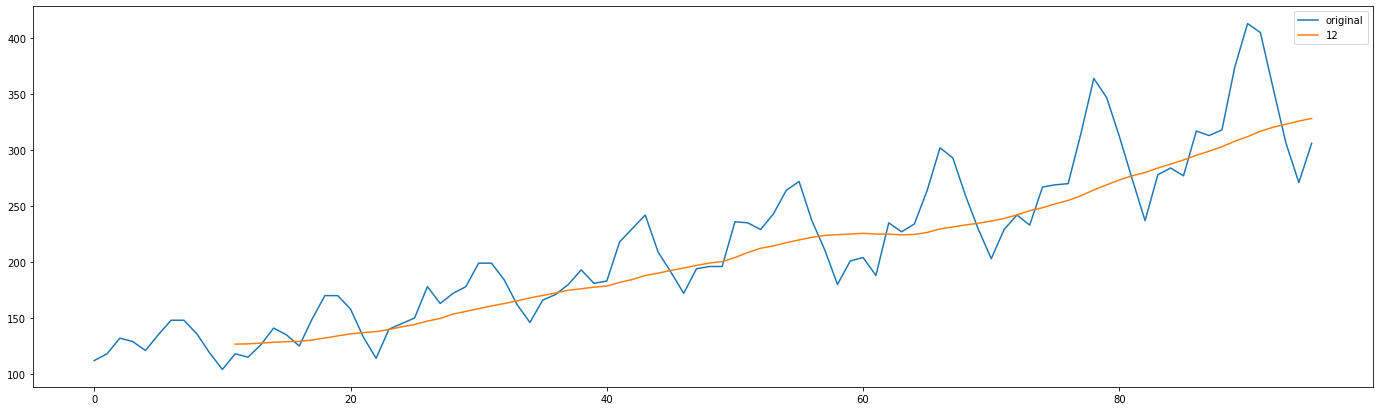

In [173]:
plt.figure(figsize=(24,7))
df["Passengers"].plot(label="original")
df["Passengers"].rolling(12).mean().plot(label=str(12))
plt.legend(loc='best')

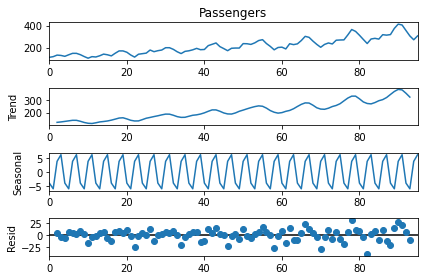

In [174]:
dec=seasonal_decompose(df["Passengers"],period=4)
dec.plot()
plt.show()

## ACF and PACF plot

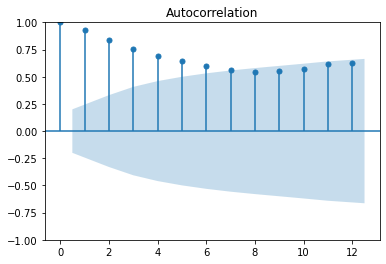

In [176]:
tsa_plots.plot_acf(df["Passengers"],lags=12)
plt.show()

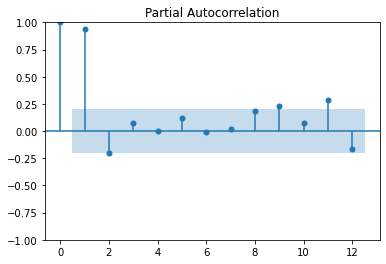

In [177]:
tsa_plots.plot_pacf(df["Passengers"],lags=12)
plt.show()

## Split data

In [179]:
train=df.head(84)
test=df.tail(12)

In [181]:
#Linear Model
linear_model=smf.ols("Passengers~t",data=train).fit()
pred_linear=linear_model.predict(test["t"])
rmse_linear=np.sqrt(mean_squared_error(test["Passengers"],pred_linear))
rmse_linear

53.199236534802715

In [182]:
#Exponential
Exp=smf.ols("log_passenger~t",data=train).fit()
pred_exp=Exp.predict(test["t"])
rmse_exp=np.sqrt(mean_squared_error(test["Passengers"],pred_exp))
rmse_exp

325.7150613551535

In [183]:
#Quadratic 
Qud=smf.ols('Passengers~t+t_square',data=train).fit()
pred_Qud=Qud.predict(test[["t","t_square"]])
rmse_Qud=np.sqrt(mean_squared_error(test["Passengers"],pred_Qud))
rmse_Qud

48.051888979330975

In [186]:
#Additive seasonality 
add_sea=smf.ols("Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov",data=train).fit()
pred_add_sea=add_sea.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']])
rmse_add_sea=np.sqrt(mean_squared_error(test["Passengers"],pred_add_sea))
rmse_add_sea

132.8197848142182

In [188]:
#Additive Seasonality Quadratic
add_sea_qua=smf.ols("Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov",data=train).fit()
pred_add_sea_qua=add_sea_qua.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"t","t_square"]])
rmse_add_sea_qua=np.sqrt(mean_squared_error(test["Passengers"],pred_add_sea))
rmse_add_sea_qua

132.8197848142182

In [189]:
##Multiplicative Seasonality
mul_sea=smf.ols("log_passenger~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov",data=train).fit()
pred_mul_sea=mul_sea.predict(test)
rmse_mul_sea=np.sqrt(mean_squared_error(test["Passengers"],pred_mul_sea))
rmse_mul_sea

326.2267987143024

In [190]:
#Multiplicative Additive Seasonality 
mul_add_sea = smf.ols('log_passenger~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = train).fit()
pred_mult_add_sea =mul_add_sea.predict(test)
rmse_mult_add_sea = np.sqrt(mean_squared_error(test["Passengers"],pred_mult_add_sea))
rmse_mult_add_sea 

325.6952488040335

In [191]:
#Multiplicative Seasonality Quadratic 
mult_sea_Quad = smf.ols('log_passenger~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_mult_sea_quad = mult_sea_Quad.predict(test)
rmse_mult_sea_quad = np.sqrt(mean_squared_error(test['Passengers'],pred_mult_sea_quad))
rmse_mult_sea_quad

325.7312105213405

In [192]:
# Compare the results
result={"model":["rmse_linear",'rmse_exp',"rmse_Qud","rmse_add_sea","rmse_add_sea_qua","rmse_mul_sea",
                 "rmse_mult_add_sea ","rmse_mult_sea_quad"],
       "RMSE_values":[rmse_linear,rmse_exp,rmse_Qud,rmse_add_sea,rmse_add_sea_qua,rmse_mul_sea,
                     rmse_mult_add_sea,rmse_mult_sea_quad]}

table=pd.DataFrame(result)
table.sort_values(["RMSE_values"])

,model,RMSE_values
2,rmse_Qud,48.051889
0,rmse_linear,53.199237
3,rmse_add_sea,132.819785
4,rmse_add_sea_qua,132.819785
6,rmse_mult_add_sea,325.695249
1,rmse_exp,325.715061
7,rmse_mult_sea_quad,325.731211
5,rmse_mul_sea,326.226799


## Using ARIMA model

In [196]:
data=pd.read_excel("C:/Users/pcc/Downloads/Airlines+Data.xlsx",header=0,index_col=0,parse_dates=True)
data

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [200]:
# separate out a validation dataset
split_pt=len(data)-12
dataset,validation=data[0:split_pt],data[split_pt:]
print('Dataset %d, validation %d' % (len(dataset), len(validation)))

dataset.to_csv("dataset.csv",header=False)
validation.to_csv("vaidation.csv",header=False)

Dataset 84, validation 12


In [201]:
data_1 = pd.read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
x=data_1.values
X = x.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [203]:
train.shape,test.shape

((42,), (42,))

In [204]:
history=[x for x in train]
prediction=list()
for i in range(len(test)):
    yhat=history[-1]
    prediction.append(yhat)
    obs=test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
    
# report performance
rmse = np.sqrt(mean_squared_error(test, prediction))
print('RMSE: %.3f' % rmse)

>Predicted=218.000, Expected=230.000
>Predicted=230.000, Expected=242.000
>Predicted=242.000, Expected=209.000
>Predicted=209.000, Expected=191.000
>Predicted=191.000, Expected=172.000
>Predicted=172.000, Expected=194.000
>Predicted=194.000, Expected=196.000
>Predicted=196.000, Expected=196.000
>Predicted=196.000, Expected=236.000
>Predicted=236.000, Expected=235.000
>Predicted=235.000, Expected=229.000
>Predicted=229.000, Expected=243.000
>Predicted=243.000, Expected=264.000
>Predicted=264.000, Expected=272.000
>Predicted=272.000, Expected=237.000
>Predicted=237.000, Expected=211.000
>Predicted=211.000, Expected=180.000
>Predicted=180.000, Expected=201.000
>Predicted=201.000, Expected=204.000
>Predicted=204.000, Expected=188.000
>Predicted=188.000, Expected=235.000
>Predicted=235.000, Expected=227.000
>Predicted=227.000, Expected=234.000
>Predicted=234.000, Expected=264.000
>Predicted=264.000, Expected=302.000
>Predicted=302.000, Expected=293.000
>Predicted=293.000, Expected=259.000
>

In [205]:
# Compare the results
result={"model":["rmse_linear",'rmse_exp',"rmse_Qud","rmse_add_sea","rmse_add_sea_qua","rmse_mul_sea",
                 "rmse_mult_add_sea ","rmse_mult_sea_quad","rmse_ARIMA"],
       "RMSE_values":[rmse_linear,rmse_exp,rmse_Qud,rmse_add_sea,rmse_add_sea_qua,rmse_mul_sea,
                     rmse_mult_add_sea,rmse_mult_sea_quad,rmse]}

table=pd.DataFrame(result)
table.sort_values(["RMSE_values"])

,model,RMSE_values
8,rmse_ARIMA,26.029287
2,rmse_Qud,48.051889
0,rmse_linear,53.199237
3,rmse_add_sea,132.819785
4,rmse_add_sea_qua,132.819785
6,rmse_mult_add_sea,325.695249
1,rmse_exp,325.715061
7,rmse_mult_sea_quad,325.731211
5,rmse_mul_sea,326.226799


### ARIMA model has least RMSE.